# MNIST Digit Recognition

In this task I will use the MNIST dataset, which is a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau. Each image is labeled with the digit it represents.

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Get Data

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = mnist.data, mnist.target

In [5]:
mnist.feature_names[:10]

['pixel1',
 'pixel2',
 'pixel3',
 'pixel4',
 'pixel5',
 'pixel6',
 'pixel7',
 'pixel8',
 'pixel9',
 'pixel10']

In [14]:
mnist.target_names

['class']

In [16]:
X[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [18]:
y[0]

'5'

In [20]:
X.shape

(70000, 784)

In [22]:
y.shape

(70000,)

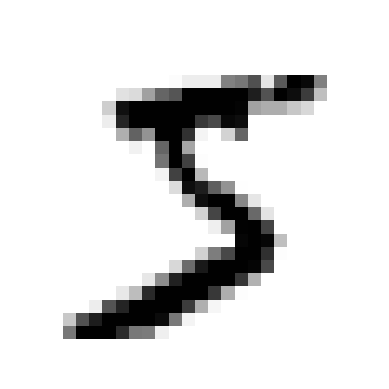

In [24]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [26]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Binary Classification

In [29]:
y_train_7 = (y_train == '7')
y_test_7 = (y_test == '7')

y_train_7, y_test_7

(array([False, False, False, ..., False, False, False]),
 array([ True, False, False, ..., False, False, False]))

In [31]:
sum(y_train_7)

6265

In [33]:
sum(y_test_7)

1028

In [37]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_7)

SGDClassifier(random_state=42)

In [43]:
some_digit = X[6]
sgd_clf.predict([some_digit])

array([False])

In [45]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_7, cv=3, scoring="accuracy")

array([0.98105, 0.9735 , 0.95335])

In [47]:
cross_val_score(sgd_clf, X_test, y_test_7, cv=3, scoring="accuracy")

array([0.96640672, 0.96639664, 0.96579658])

In [49]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_train_pred = sgd_clf.predict(X_train)
y_test_pred = sgd_clf.predict(X_test)

print("Train Results")
print(f"Precision: {precision_score(y_train_pred, y_train_7)}")
print(f"Recall: {recall_score(y_train_pred, y_train_7)}")
print(f"F1 Score: {f1_score(y_train_pred, y_train_7)}")

print("Test Results")
print(f"Precision: {precision_score(y_test_pred, y_test_7)}")
print(f"Recall: {recall_score(y_test_pred, y_test_7)}")
print(f"F1 Score: {f1_score(y_test_pred, y_test_7)}")

Train Results
Precision: 0.9112529928172386
Recall: 0.9496007984031936
F1 Score: 0.9300317667182536
Test Results
Precision: 0.8959143968871596
Recall: 0.929364278506559
F1 Score: 0.9123328380386329


In [55]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_7, y_train_pred)

In [67]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_7, y_train_pred)

0.952807104950538

Here's what it measures in simple terms:

ROC Curve: This curve plots the true positive rate (recall) against the false positive rate for different threshold values of a classifier.

AUC (Area Under the Curve): The area under this curve (AUC) is a single scalar value that summarizes the overall ability of the classifier to discriminate between the positive and negative classes.

The roc_auc_score returns a value between 0 and 1:

1.0: Perfect classifier

0.5: Classifier that performs no better than random guessing

0.0: Perfectly wrong classifier (classifies all negatives as positives and vice versa)

# Multiclass Classification

In [74]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [78]:
svm_clf.predict([some_digit])

array(['1'], dtype=object)

In [80]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[-0.3 ,  9.3 ,  5.11,  7.22,  3.95,  6.19,  2.8 ,  1.77,  7.18,
         1.78]])

In [82]:
class_id = some_digit_scores.argmax()
class_id

1

In [84]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[:2000].astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train[:2000], cv=3, scoring="accuracy")

array([0.85907046, 0.8185907 , 0.85435435])

In [98]:
X_train = X_train[:2000]
X_test = X_test[:100]
y_train = y_train[:2000]
y_test = y_test[:100]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svc = SVC(kernel='linear', probability=True, random_state=42)
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
y_prob = svc.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
roc_auc_ovr = roc_auc_score(y_pred, y_prob, multi_class='ovr')
roc_auc_ovo = roc_auc_score(y_pred, y_prob, multi_class='ovo')

# Print the metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC (One-versus-Rest): {roc_auc_ovr:.4f}')
print(f'ROC AUC (One-versus-One): {roc_auc_ovo:.4f}')

Accuracy: 0.9700
Precision: 0.9727
Recall: 0.9657
F1 Score: 0.9654
ROC AUC (One-versus-Rest): 0.9998
ROC AUC (One-versus-One): 0.9998


# Multilabel Classification

In [101]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [103]:
knn_clf.predict([some_digit])

array([[False, False]])

In [107]:
from sklearn.model_selection import cross_val_predict

y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)

In [109]:
y_train_knn_pred

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [False,  True],
       [ True,  True],
       [False, False]])

In [117]:
y_test_large = (y_test >= '7')
y_test_odd = (y_test.astype('int8') % 2 == 1)
y_multilabel = np.c_[y_test_large, y_test_odd]

In [119]:
y_multilabel_test = y_multilabel

In [121]:
# Make predictions
y_pred = knn_clf.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_multilabel_test, y_pred)
precision = precision_score(y_multilabel_test, y_pred, average='macro')
recall = recall_score(y_multilabel_test, y_pred, average='macro')
f1 = f1_score(y_multilabel_test, y_pred, average='macro')

# Print the metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.9200
Precision: 0.9315
Recall: 0.9557
F1 Score: 0.9433


# Multioutput Classification

In [144]:
np.random.seed(42)  # to make this code example reproducible
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

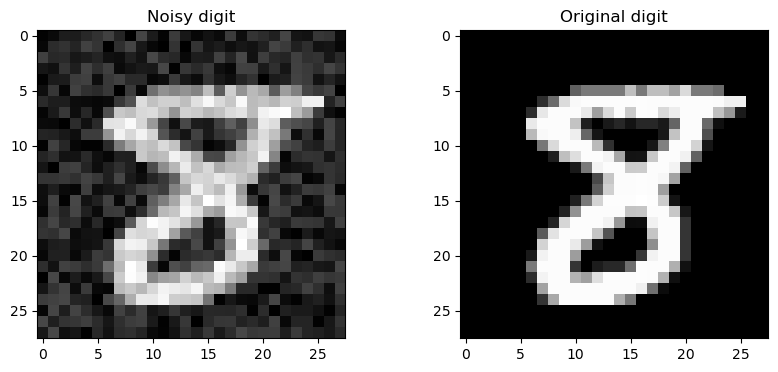

In [148]:
import matplotlib.pyplot as plt

# Create a figure and axis
plt.figure(figsize=(10, 4))  # Set the figure size for better visibility

# Plot the noisy digit
plt.subplot(121)
plt.imshow(X_test_mod.iloc[0].values.reshape(28, 28), cmap='gray')  # Reshape and display the image
plt.title("Noisy digit")

# Plot the original digit
plt.subplot(122)
plt.imshow(y_test_mod.iloc[0].values.reshape(28, 28), cmap='gray')  # Reshape and display the image
plt.title("Original digit")

# Display the plots
plt.show()